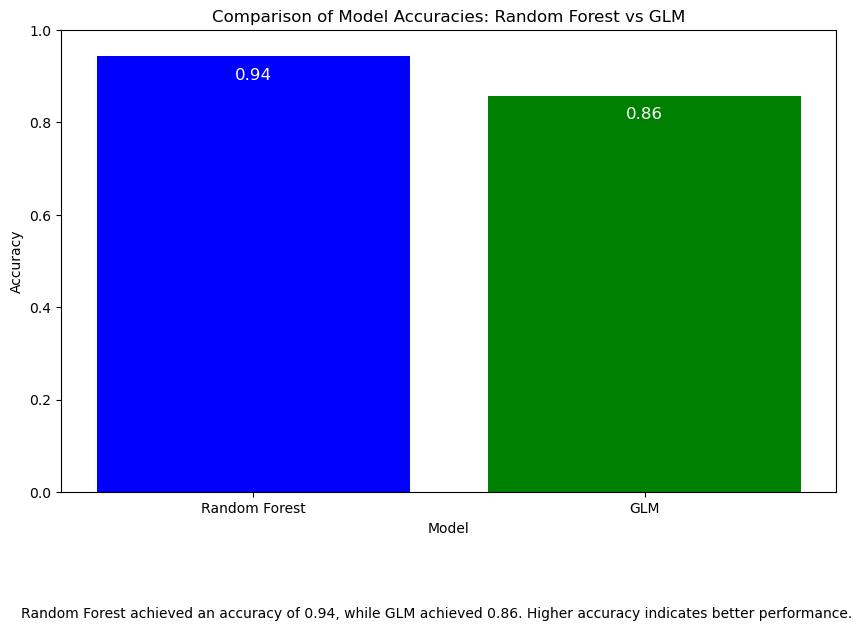

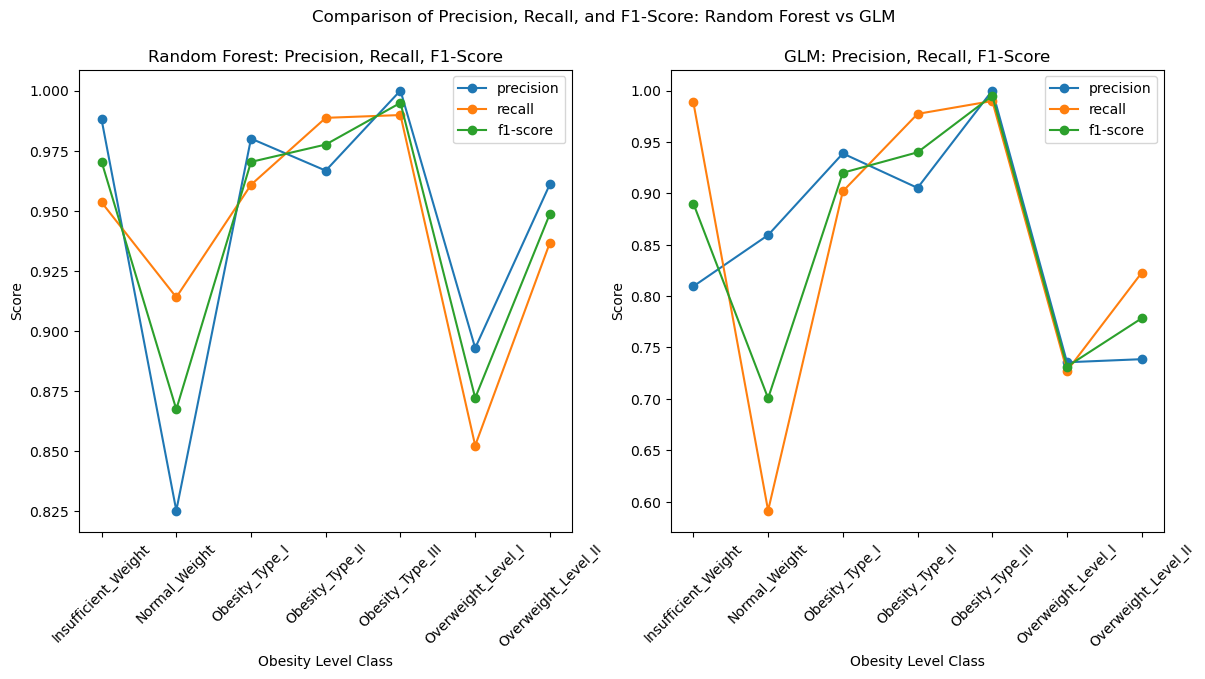

In [15]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load data
#df = pd.read_csv("dataset.csv")
df = pd.read_csv('C:/Users/naren/dataset.csv')

# Rename for clearer column names
df = df.rename(columns={
    "FAVC": "high_calories_frequently",
    "FCVC": "vegetable_consumption",
    "NCP": "meals_per_day",
    "CAEC": "eat_between_meals",
    "CH2O": "daily_water_intake",
    "SCC": "monitor_calories",
    "FAF": "physical_activity_frequency",
    "TUE": "technology_usage_frequency",
    "CALC": "alcohol_consumption_frequency",
    "MTRANS": "transportation_method",
    "NObeyesdad": "obesity_level"
})

# Encode categorical variables
categorical_variables = ["Gender", "family_history_with_overweight", "high_calories_frequently", 
                         "eat_between_meals", "SMOKE", "monitor_calories", 
                         "alcohol_consumption_frequency", "transportation_method", "obesity_level"]

label_encoders = {}
for variable in categorical_variables:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable])
    label_encoders[variable] = le

# Model Selection
# RandomForestClassifier 
X = df.drop(columns=['obesity_level'])
y = df['obesity_level']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

# GLM Model
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model 
glm_model = LogisticRegression(max_iter=9000, random_state=42, solver='saga')
glm_model.fit(X_train, y_train)

# Make predictions
glm_y_pred = glm_model.predict(X_test)
glm_accuracy = accuracy_score(y_test, glm_y_pred)
glm_report = classification_report(y_test, glm_y_pred, output_dict=True)


# bar plot to compare accuracies with interpretation ------- Code By Narendra ------------------------
models = ['Random Forest', 'GLM']
accuracies = [rf_accuracy, glm_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies: Random Forest vs GLM')

# interpretation
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, 
             f'{accuracy:.2f}', ha='center', color='white', fontsize=12)

plt.figtext(0.5, -0.1, 
            'Random Forest achieved an accuracy of {:.2f}, while GLM achieved {:.2f}. '
            'Higher accuracy indicates better performance.'.format(rf_accuracy, glm_accuracy), 
            ha='center', fontsize=10)
plt.show()

# Prepare data for precision, recall, and F1-score line plots
rf_metrics = pd.DataFrame(rf_report).T
glm_metrics = pd.DataFrame(glm_report).T

# Drop the 'accuracy' rows as they are not needed for the line plot
rf_metrics = rf_metrics.drop(['accuracy', 'macro avg', 'weighted avg'])
glm_metrics = glm_metrics.drop(['accuracy', 'macro avg', 'weighted avg'])

# Convert index to integers for proper labeling
rf_metrics.index = rf_metrics.index.astype(int)
glm_metrics.index = glm_metrics.index.astype(int)

# Retrieve class names for obesity_level
class_names = label_encoders['obesity_level'].classes_

# Plotting Precision, Recall, and F1-score for each class
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for Random Forest
rf_metrics[['precision', 'recall', 'f1-score']].plot(kind='line', ax=ax[0], marker='o')
ax[0].set_title('Random Forest: Precision, Recall, F1-Score')
ax[0].set_xlabel('Obesity Level Class')
ax[0].set_ylabel('Score')
ax[0].set_xticks(rf_metrics.index)
ax[0].set_xticklabels(class_names, rotation=45)
ax[0].legend(loc='best')

# Line plot for GLM
glm_metrics[['precision', 'recall', 'f1-score']].plot(kind='line', ax=ax[1], marker='o')
ax[1].set_title('GLM: Precision, Recall, F1-Score')
ax[1].set_xlabel('Obesity Level Class')
ax[1].set_ylabel('Score')
ax[1].set_xticks(glm_metrics.index)
ax[1].set_xticklabels(class_names, rotation=45)
ax[1].legend(loc='best')

plt.suptitle('Comparison of Precision, Recall, and F1-Score: Random Forest vs GLM')
plt.show()

# interpretation for the line plot
# The line plots show precision, recall, and F1-score for each obesity level class
# Higher values indicate better performance for that class.The Random Forest model shows higher precision, recall, and F1-scores for certain classes compared to the GLM model,
# The Random Forest model is better at correctly identifying instances of those classes, minimizing both false positives and false negatives.